In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , ifft , fftshift
#from s c i p y . f f t import f f t , i f f t , f f t s h i f t
from scipy.signal.windows import hann , flattop

In [2]:
f1 = 400 # Hz
f2 = 400.25 # Hz
f3 = 399.75 # Hz
fs = 600 # Hz
N = 3000
k = np.arange(N)
x1 = np.sin (2*np.pi * f1 / fs *k)
x2 = np.sin (2*np.pi * f2 / fs *k)
x3 = np.sin (2*np.pi * f3 / fs *k)

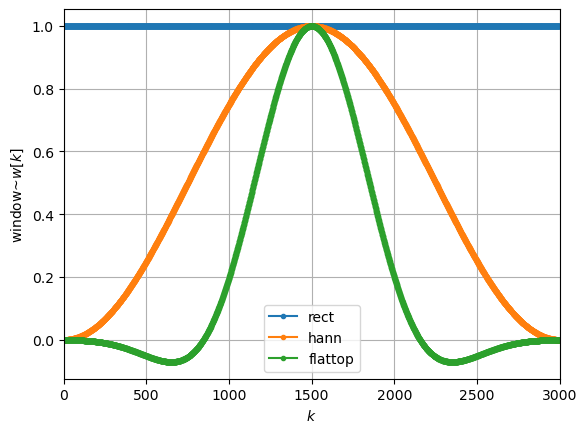

In [3]:
wrect = np.ones (N)
whann = hann(N, sym=False )
wflattop = flattop (N, sym=False )
plt.plot (wrect,'C0o-', ms=3,label='rect') 
plt.plot(whann,'C1o-',ms=3,label='hann')
plt.plot (wflattop,'C2o-',ms=3,label='flattop')
plt.xlabel(r'$k$')
plt.ylabel ( r'window~$w[k]$')
plt.xlim (0,N)
plt.legend()
plt.grid(True) 


In [4]:
X1wrect = fft(x1)
X2wrect = fft(x2)
X3wrect = fft(x3)
X1whann = fft(x1*whann)
X2whann = fft(x2*whann)
X3whann = fft(x3*whann)
X1wflattop = fft(x1*wflattop)
X2wflattop = fft(x2*wflattop)
X3wflattop = fft(x3*wflattop)

In [5]:
def fft2db(X) :
    N=X.size
    Xtmp = 2/N*X # i n d e p e n d e n t o f N, norm f o r s i n e a m p l i t u d e s
    Xtmp[0]*= 1/2 # b i n f o r f =0 Hz i s e x i s t i n g o n l y once ,
    #so c a n c e l ∗2 from above
    if N % 2 == 0 : # f s /2 i s i n c l u d e d as a b i n
        # f s /2 b i n i s e x i s t i n g o n l y once , so c a n c e l ∗2 from above
        #6
        Xtmp [N//2] = Xtmp [N//2] / 2
    return 20*np.log10(np.abs(Xtmp))

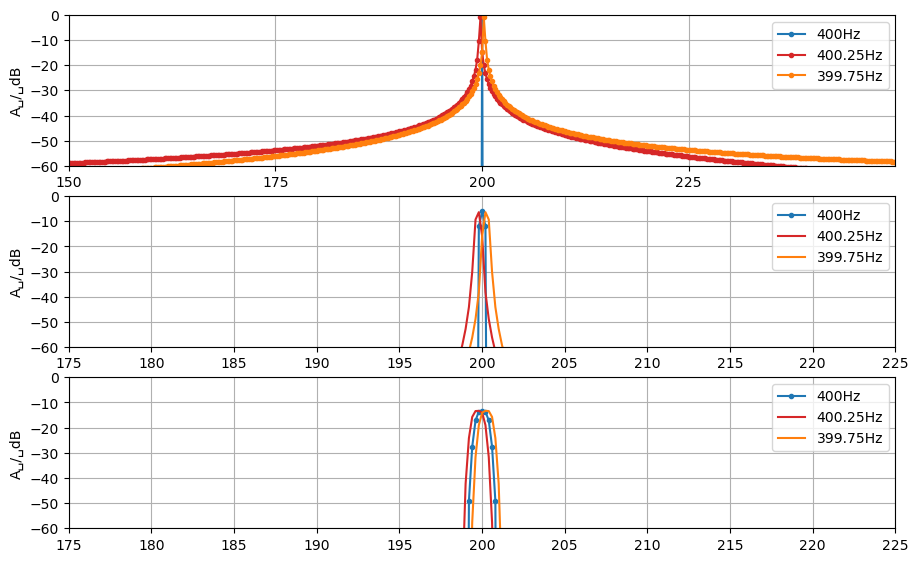

In [6]:
df=fs/N
f=np.arange(N)*df 

plt.figure(figsize=(16/1.5,10/1.5))
plt.subplot(3,1,1)
plt.plot(f,fft2db(X1wrect),"C0o-",ms=3,label="400Hz")
plt.plot(f,fft2db(X2wrect),"C3o-",ms=3,label="400.25Hz")
plt.plot(f,fft2db(X3wrect),"C1o-",ms=3,label="399.75Hz")
plt.xlim(150,250)
plt.ylim(-60,0)
plt.xticks(np.arange(150,250,25))
plt.yticks(np.arange(-60,10,10))
plt.legend()
#plt.xlabel("f/Hz")
plt.ylabel("A␣/␣dB")
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(f,fft2db(X1whann),"C0o-",ms=3,label="400Hz")
plt.plot(f,fft2db(X2whann),"C3-",ms=3,label="400.25Hz")
plt.plot(f,fft2db(X3whann),"C1-",ms=3,label="399.75Hz")
plt.xlim(175,225)
plt.ylim(-60,0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-60,10,10))
plt.legend()
#plt.xlabel("f/Hz")
plt.ylabel("A␣/␣dB")
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(f,fft2db(X1wflattop),"C0o-",ms=3,label="400Hz")
plt.plot(f,fft2db(X2wflattop),"C3-",ms=3,label="400.25Hz")
plt.plot(f,fft2db(X3wflattop),"C1-",ms=3,label="399.75Hz")
plt.xlim(175,225)
plt.ylim(-60,0)
plt.xticks(np.arange(175,230,5))
plt.yticks(np.arange(-60,10,10))
plt.legend()
#plt.xlabel("f/Hz")
plt.ylabel("A␣/␣dB")
plt.grid(True)



In [7]:
def winDTFTdB(w):
    N=w.size#getwindowlength
    Nz=100*N#zeropaddinglength
    W=np.zeros(Nz)#allocateRAM
    W[0:N]=w#insertwindow
    W=np.abs(fftshift(fft(W)))#fft,fftshiftandmagnitude
    W/=np.max(W)#normalizetomaximum,i.e.themainlobe
    #maximumhere
    W=20*np.log10(W)#getlevelindB
    #getappropriatedigitalfrequencies
    Omega=2*np.pi/Nz*np.arange(Nz)-np.pi#alsoshifted
    return Omega, W


C:\Users\Tomasz 2115\AppData\Local\Temp\ipykernel_21244\3146830448.py:9: RuntimeWarning: divide by zero encountered in log10
  W=20*np.log10(W)#getlevelindB


(-0.031415926535897934, 0.031415926535897934)

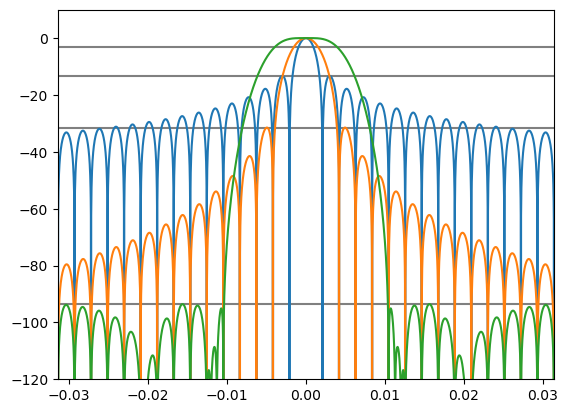

In [8]:
plt.plot([-np.pi,+np.pi],[-3.01,-3.01],"gray")#mainlobebandwidth
plt.plot([-np.pi,+np.pi],[-13.3,-13.3],"gray")#rectmaxsidelobe
plt.plot([-np.pi,+np.pi],[-31.5,-31.5],"gray")#hannmaxsidelobe
plt.plot([-np.pi,+np.pi],[-93.6,-93.6],"gray")#flattopmax
#sidelobe
Omega,W=winDTFTdB(wrect)
plt.plot(Omega,W,label="rect")
Omega,W=winDTFTdB(whann)
plt.plot(Omega,W,label="hann")
Omega,W=winDTFTdB(wflattop)
plt.plot(Omega,W,label="flattop")
plt.xlim(-np.pi,np.pi)
plt.ylim(-120,10)
plt.xlim(-np.pi/100,np.pi/100)